In [ ]:
!pip install torch==2.0.1 torchtext==0.5.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from torchtext.vocab import GloVe
import torchtext.data as ttd
import torchtext

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
df.columns = ['Label', 'data']

In [ ]:
df.head()

,Label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Encoding categorical variabe of Label
df['new_label'] = df['Label'].map({'ham':0, 'spam':1})
new_df = df.drop('Label', axis=1)
new_df.head()

,data,new_label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
new_df.to_csv('spam2.csv', index=False)

In [ ]:
Text = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    pad_first=True,

)
Label = ttd.Field(sequential=False, use_vocab=False, is_target=True)

In [ ]:
dataset = ttd.TabularDataset(
    path='/content/spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', Text), ('label', Label)]
)

In [ ]:
train_data, test_data = dataset.split()

In [ ]:
Text.build_vocab(train_data,)

In [ ]:
vocab = Text.vocab
len(vocab)

12543

In [ ]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7bc4cb133790>>,
            {'<unk>': 0, '<pad>': 1})

In [ ]:
vocab.itos

['<unk>',
 '<pad>',
 'to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'for',
 'u',
 'my',
 'of',
 'me',
 'your',
 'on',
 'have',
 '2',
 'that',
 'are',
 'it',
 'call',
 'or',
 'be',
 'with',
 'at',
 'not',
 'get',
 'can',
 'will',
 'ur',
 'so',
 'U',
 '&lt;#&gt;',
 "I'm",
 'but',
 'do',
 '4',
 'You',
 'from',
 'if',
 'up',
 'we',
 '.',
 'just',
 'all',
 'go',
 'this',
 'when',
 'got',
 'know',
 'like',
 'was',
 'out',
 '?',
 'come',
 'now',
 'am',
 'time',
 '...',
 'then',
 'want',
 'Call',
 'If',
 'n',
 'as',
 'about',
 'send',
 "I'll",
 'by',
 'its',
 'only',
 'How',
 'he',
 'one',
 'what',
 'going',
 'need',
 'no',
 'still',
 'our',
 'Just',
 'No',
 'been',
 'back',
 'text',
 'see',
 'how',
 'any',
 'But',
 'some',
 '&',
 'good',
 'has',
 'love',
 'there',
 'think',
 'r',
 'dont',
 'So',
 'home',
 'take',
 'Ì_',
 'And',
 'Do',
 'We',
 'day',
 'My',
 'Your',
 'her',
 'make',
 'What',
 'an',
 'me.',
 'A',
 "don't",
 'more',
 'phone',
 'Ok',
 'free',
 'him',
 'tell',
 'mo

In [ ]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_data, test_data), sort_key=lambda x: len(x.data),
    batch_sizes=(32, 256)
)

In [ ]:
len(vocab)

12543

In [ ]:
for inputs, targets in test_iter:
  print(inputs,  inputs.shape)
  print(targets, targets.shape)
  break

tensor([[  962, 10615,     0,    57,  2998,     0],
        [  107,    31,   171,   421,   727,  7355],
        [    0,    31,    57,     0,    35, 10246],
        ...,
        [    1,     1,     1,     1,     1,   408],
        [    1,     1,     1,     1,     1,     0],
        [    1,     1,     1,     1,     1,     0]]) torch.Size([256, 6])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [ ]:
import torch.nn.functional as F

In [ ]:
class RNN(nn.Module):

  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):

    super().__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.k = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
       num_layers=self.L,
        batch_first=True
    )
    self.fc1 = nn.Linear(self.M, 20)
    self.fc2 = nn.Linear(20, self.k)
  def forward(self, X):
    h0 = torch.zeros(self.L, X.size(0), self.M)
    c0 = torch.zeros(self.L, X.size(0), self.M)

    out = self.embed(X)
    out, _ = self.rnn(out, (h0, c0))

    out, _ = torch.max(out, 1)

    out = F.relu(self.fc1(out))
    out = self.fc2(out)
    return out

In [ ]:
model = RNN(len(vocab), 30, 15, 2, 1)

In [ ]:
model

RNN(
  (embed): Embedding(12543, 30)
  (rnn): LSTM(30, 15, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=15, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)

In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train_model(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = {}
  test_losses = {}
  train_acc = {}
  test_acc = {}
  n_correct_train = 0
  n_total_train = 0
  n_correct_test = 0
  n_total_test = 0
  for it in range(epochs):
    train_loss = []
    for input, target in train_iter:
      target = target.view(-1,1).float()
      optimizer.zero_grad()
      output= model(input)
      loss = criterion(output, target)
      pred = (output >0)
      n_correct_train += (pred == target).sum().item()
      n_total_train += target.shape[0]
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    train_losses[it] = np.mean(train_loss)
    train_acc[it] = n_correct_train / n_total_train

    test_loss = []
    for input, target in test_iter:
      target = target.view(-1,1).float()
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
      pred = (output >0)
      n_correct_test += (pred == target).sum().item()
      n_total_test += target.shape[0]
    test_losses[it] = np.mean(test_loss)
    test_acc[it] = n_correct_test / n_total_test
    print(f'epoch{it+1}: train loss: {train_losses[it]}, train_acc: {train_acc[it]}, test loss: {test_losses[it]}, test_acc:{test_acc[it]}')
  return train_losses, test_losses, train_acc, test_acc

In [ ]:
train_losses, test_losses, train_acc, test_acc = train_model(model, criterion, optimizer, train_iter, test_iter, epochs=15)

epoch1: train loss: 0.48159200270644953, train_acc: 0.8482051282051282, test loss: 0.43475389054843355, test_acc:0.8594497607655502
epoch2: train loss: 0.3788953005778985, train_acc: 0.8584615384615385, test loss: 0.4217022103922708, test_acc:0.8594497607655502
epoch3: train loss: 0.3021624671509031, train_acc: 0.8618803418803419, test loss: 0.35318360584122793, test_acc:0.8648325358851675
epoch4: train loss: 0.19434706704904797, train_acc: 0.8760256410256411, test loss: 0.2681753912142345, test_acc:0.8788875598086124
epoch5: train loss: 0.10562312499177261, train_acc: 0.895948717948718, test loss: 0.24441647742475783, test_acc:0.8843301435406699
epoch6: train loss: 0.06200734383930437, train_acc: 0.9110683760683761, test loss: 0.2209437553371702, test_acc:0.8903508771929824
epoch7: train loss: 0.04534957702576992, train_acc: 0.9224542124542124, test loss: 0.188381341951234, test_acc:0.8977272727272727
epoch8: train loss: 0.03638499232054856, train_acc: 0.9311538461538461, test loss: 0

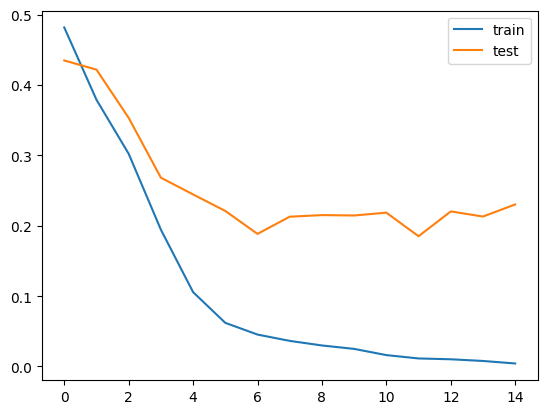

In [ ]:
plt.plot(train_losses.values(), label='train')
plt.plot(test_losses.values(), label='test')
plt.legend()

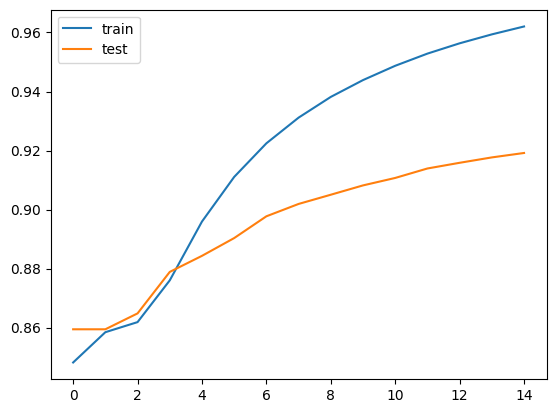

In [ ]:
plt.plot(train_acc.values(), label='train')
plt.plot(test_acc.values(), label='test')
plt.legend()